In [25]:
# Install necessary libraries if not already installed
# !pip install yfinance matplotlib seaborn pandas numpy plotly scikit-learn

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# !pip install tensorflow scikit-learn
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler


#plt.style.use('seaborn-darkgrid')


In [5]:
# Download Apple stock data (AAPL)
stock = yf.download("AAPL", start="2020-01-01", end="2024-01-01")
stock.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.620857  72.681304  71.373233  71.627107  135480400
2020-01-03  71.914818  72.676447  71.689957  71.847118  146322800
2020-01-06  72.487854  72.526541  70.783256  71.034717  118387200
2020-01-07  72.146935  72.753816  71.926907  72.497522  108872000
2020-01-08  73.307526  73.609760  71.849548  71.849548  132079200

In [7]:
#Visualize Closing Price

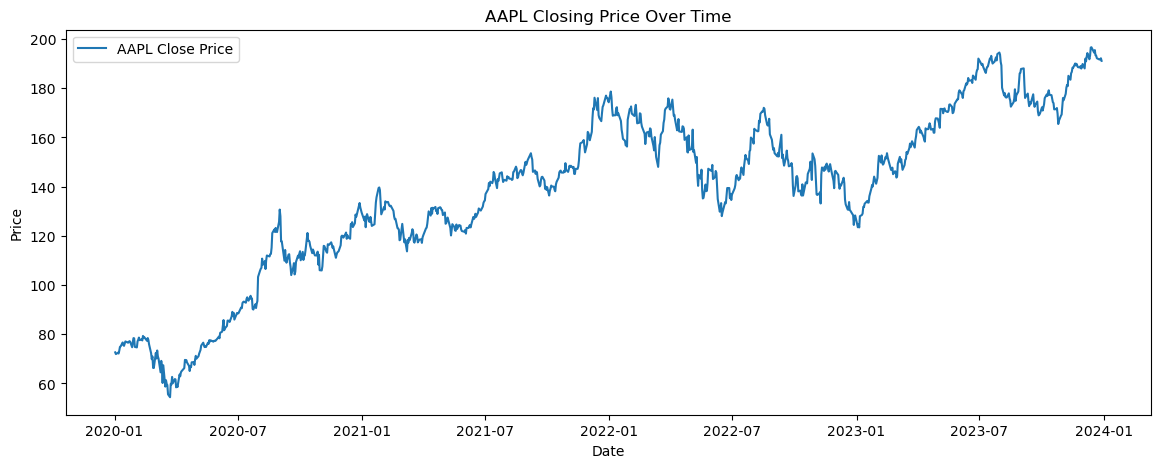

In [8]:
plt.figure(figsize=(14, 5))
plt.plot(stock['Close'], label='AAPL Close Price')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
# Calculate and Plot Moving Averages

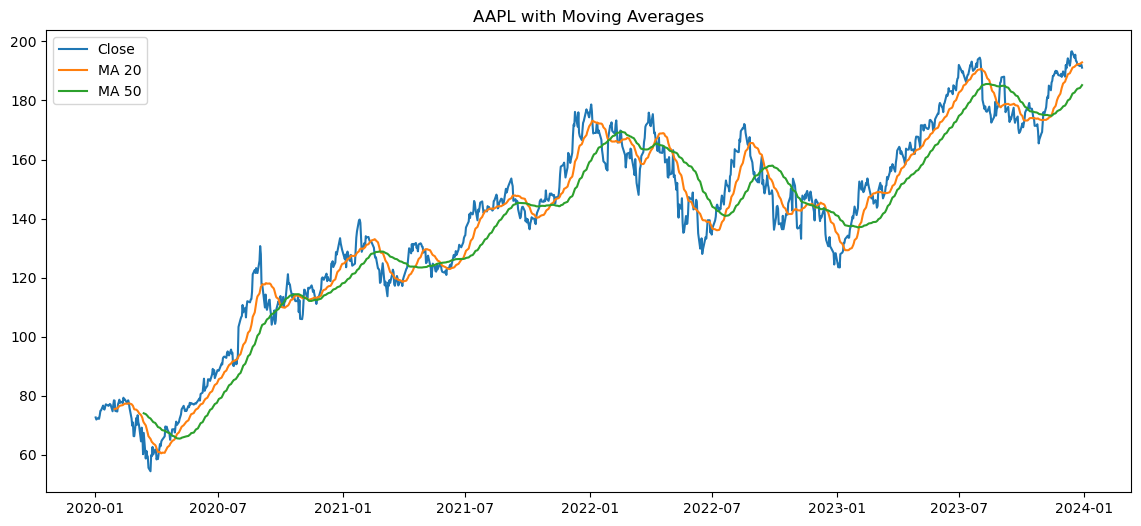

In [10]:
stock['MA20'] = stock['Close'].rolling(window=20).mean()
stock['MA50'] = stock['Close'].rolling(window=50).mean()

plt.figure(figsize=(14, 6))
plt.plot(stock['Close'], label='Close')
plt.plot(stock['MA20'], label='MA 20')
plt.plot(stock['MA50'], label='MA 50')
plt.title('AAPL with Moving Averages')
plt.legend()
plt.show()


In [11]:
# Calculate Daily Returns

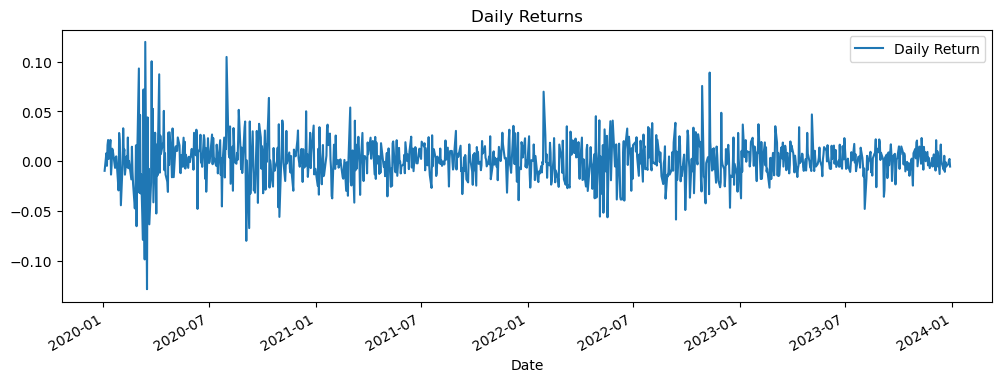

In [12]:
stock['Daily Return'] = stock['Close'].pct_change()
stock['Daily Return'].plot(figsize=(12, 4), legend=True, title='Daily Returns')
plt.show()


In [13]:
# Histogram of Daily Returns

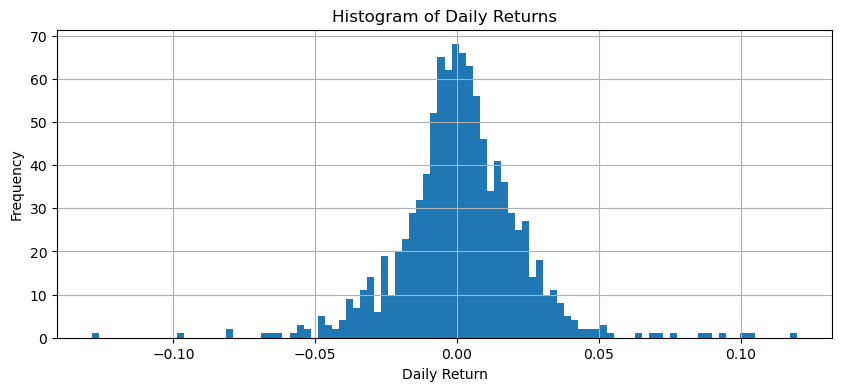

In [14]:
stock['Daily Return'].hist(bins=100, figsize=(10, 4))
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()


In [15]:
# Candlestick Chart with Plotly

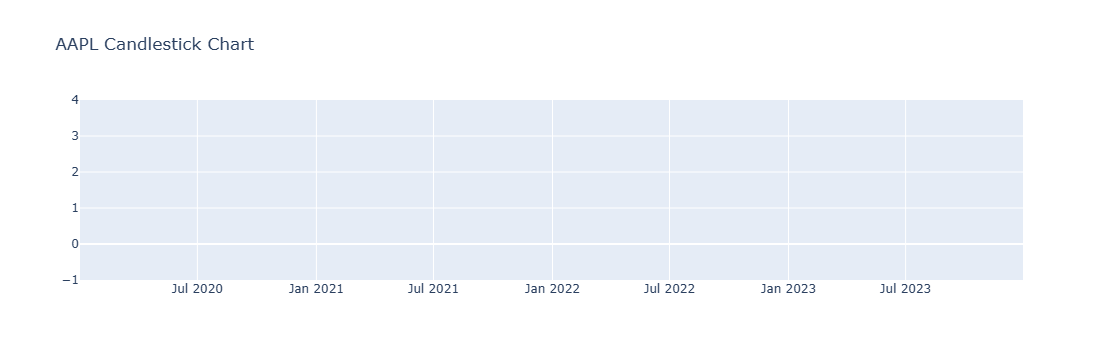

In [16]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(
    x=stock.index,
    open=stock['Open'],
    high=stock['High'],
    low=stock['Low'],
    close=stock['Close']
)])
fig.update_layout(title='AAPL Candlestick Chart', xaxis_rangeslider_visible=False)
fig.show()


In [17]:
# Correlation Between Multiple Stocks

[*********************100%***********************]  4 of 4 completed


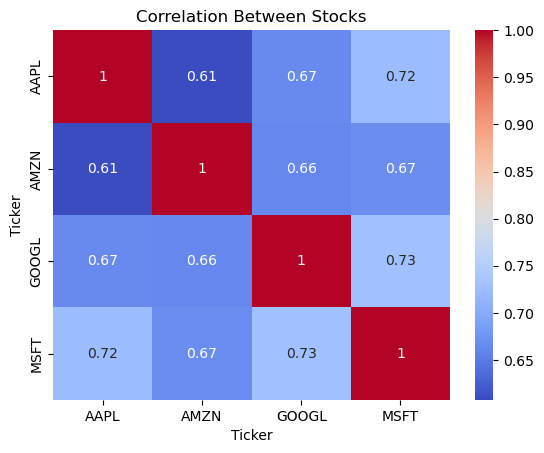

In [18]:
tickers = ['AAPL', 'MSFT', 'GOOGL', 'AMZN']
data = yf.download(tickers, start="2021-01-01", end="2024-01-01")['Close']
returns = data.pct_change()

sns.heatmap(returns.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Stocks")
plt.show()


In [19]:
# Predict Future Price Using Linear Regression

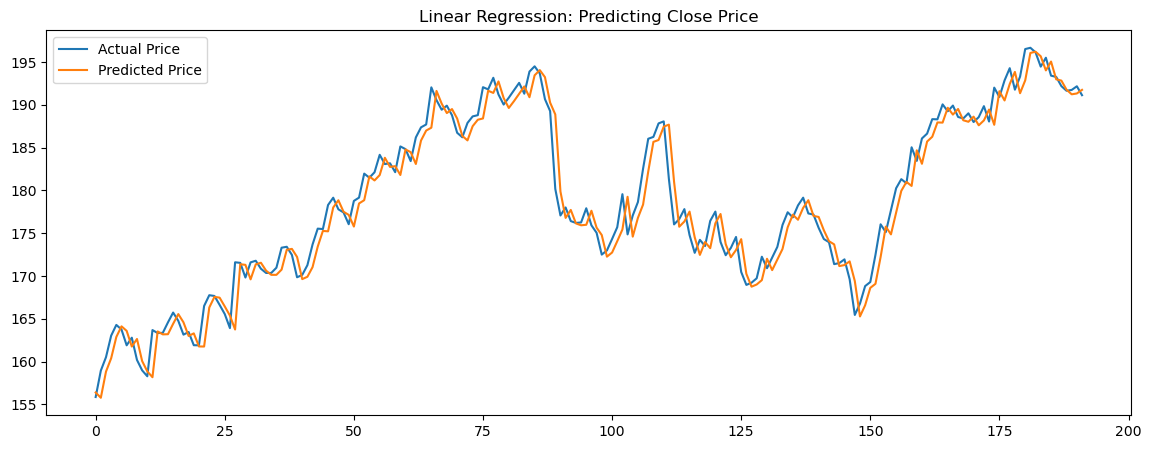

In [20]:
# Simplified example: Predict Close price from previous day's price
stock['Prev Close'] = stock['Close'].shift(1)
stock.dropna(inplace=True)

X = stock[['Prev Close']]
y = stock['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

model = LinearRegression()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Actual Price')
plt.plot(predictions, label='Predicted Price')
plt.legend()
plt.title('Linear Regression: Predicting Close Price')
plt.show()


In [21]:
# Add Technical Indicators (RSI, MACD)

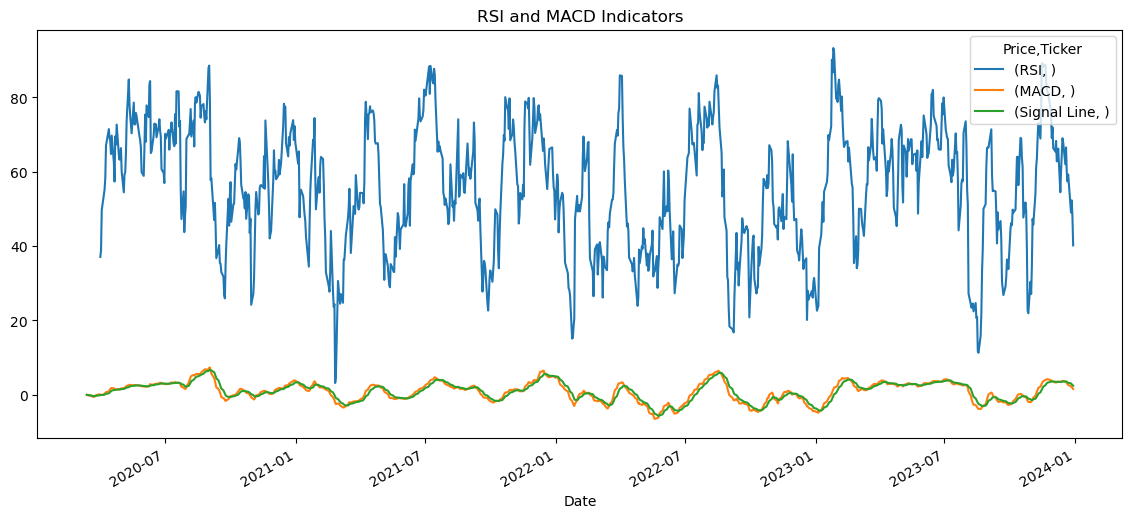

In [22]:
# RSI (Relative Strength Index)
delta = stock['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))
stock['RSI'] = rsi

# MACD
ema12 = stock['Close'].ewm(span=12).mean()
ema26 = stock['Close'].ewm(span=26).mean()
macd = ema12 - ema26
signal = macd.ewm(span=9).mean()
stock['MACD'] = macd
stock['Signal Line'] = signal

stock[['RSI', 'MACD', 'Signal Line']].plot(figsize=(14, 6), title='RSI and MACD Indicators')
plt.show()


In [23]:
# Backtesting a Simple Strategy (Moving Average Crossover)

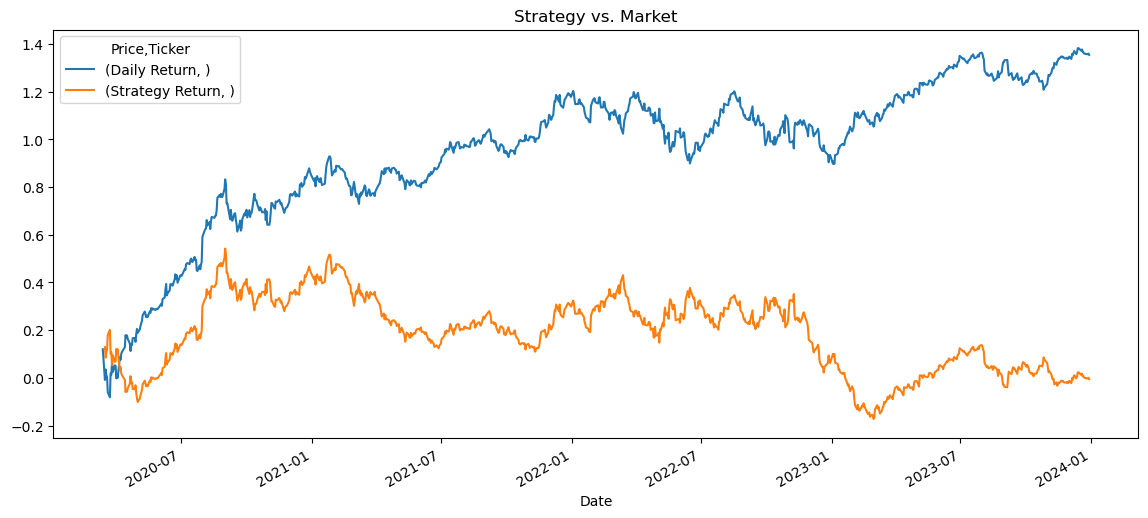

In [24]:
stock['Signal'] = 0
stock.loc[stock['MA20'] > stock['MA50'], 'Signal'] = 1
stock.loc[stock['MA20'] < stock['MA50'], 'Signal'] = -1

stock['Strategy Return'] = stock['Signal'].shift(1) * stock['Daily Return']
(stock[['Daily Return', 'Strategy Return']].cumsum()).plot(figsize=(14, 6), title='Strategy vs. Market')
plt.show()
